In [2]:
import pandas as pd
import numpy as np
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
df = pd.read_csv('data/원딜.csv')
df.drop('Unnamed: 0',1,inplace=True)
df.head(2)

C:\Users\ice_9\AppData\Local\Temp\ipykernel_9324\2832957316.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop('Unnamed: 0',1,inplace=True)


,win,분당 킬,분당 어시,분당 데스,퍼블유무,퍼블어시유무,분당 얻은 골드,분당 피해량,분당 cc건시간,분당 CS,분당 죽은시간,분당 시야점수
0,True,0.18,0.25,0.22,False,False,336.42,382.98,0.18,4.0,4.27,0.11
1,False,0.14,0.18,0.33,False,False,338.52,489.97,0.65,4.0,7.46,0.33


### vif지표 확인 (다중공선성 확인)
 - 다중공선성 : 회귀분석에서 사용된 모형의 컬럼이 다른컬럼과 상관 정도가 높아, 데이터 분석시 부정적인 영향을 미치는 현상  
 - 일반적으로 vif값이 10이상이면 다중공선성의 문제가 있다고 간주한다. 
 - 엄격하게 보는 경우 5이상

#### 다중공선성확인할 떄 컬럼이름에 띄어쓰기 있으면 안되서 언더바_ 붙여서 rename

In [3]:
df1= df.rename(columns={'분당 킬':'분당_킬', '분당 어시':'분당_어시', '분당 데스':'분당_데스', '퍼블유무' : '퍼블유무', '퍼블어시유무' : '퍼블어시유무', '분당 얻은 골드' :'분당_얻은_골드',
       '분당 피해량': '분당_피해량', '분당 cc건시간':'분당_cc건시간', '분당 CS':'분당_cs', '분당 죽은시간' : '분당_죽은시간', '분당 시야점수': '분당_시야점수'})
df1.head(2)

,win,분당_킬,분당_어시,분당_데스,퍼블유무,퍼블어시유무,분당_얻은_골드,분당_피해량,분당_cc건시간,분당_cs,분당_죽은시간,분당_시야점수
0,True,0.18,0.25,0.22,False,False,336.42,382.98,0.18,4.0,4.27,0.11
1,False,0.14,0.18,0.33,False,False,338.52,489.97,0.65,4.0,7.46,0.33


In [4]:
y, X = dmatrices('win ~ 분당_킬 + 분당_어시 + 분당_데스 + 퍼블유무 + 퍼블어시유무+ 분당_얻은_골드 +분당_피해량+분당_cc건시간+분당_cs+분당_죽은시간+분당_시야점수', data=df1 ,return_type='dataframe')
df_vif = pd.DataFrame()
df_vif['colname'] = X.columns
df_vif['VIF'] = [vif(X.values, i) for i in range(X.shape[1])]
df_vif

,colname,VIF
0,Intercept,83.578977
1,퍼블유무[T.True],1.083011
2,퍼블어시유무[T.True],1.046033
3,분당_킬,7.620442
4,분당_어시,1.542686
5,분당_데스,4.571289
6,분당_얻은_골드,9.925357
7,분당_피해량,3.094934
8,분당_cc건시간,1.138332
9,분당_cs,2.088966


### 컬럼별 수치의 scale이 다르므로 train,test 데이터에 minmaxscaler를 사용한 후에 모델학습을 진행시킨다.

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X_train, X_test, y_train, y_test = train_test_split(df.drop('win',1),df['win'], random_state=0)

scaler = MinMaxScaler()
scaler.fit(X_train)  #train꺼로 transform한걸로 fit 중요!!!!
X_train_temp = scaler.transform(X_train)
X_test_temp = scaler.transform(X_test)
X_train = pd.DataFrame(X_train_temp, columns=X_train.columns, index=list(X_train.index.values))
X_test = pd.DataFrame(X_test_temp, columns=X_test.columns, index=list(X_test.index.values))

C:\Users\ice_9\AppData\Local\Temp\ipykernel_9324\2179540545.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_train, X_test, y_train, y_test = train_test_split(df.drop('win',1),df['win'], random_state=0)


##### 여기부터 모델링시작 하이퍼파라미터는 대충사용

1.0 0.724
0.868 0.722
0.873 0.764


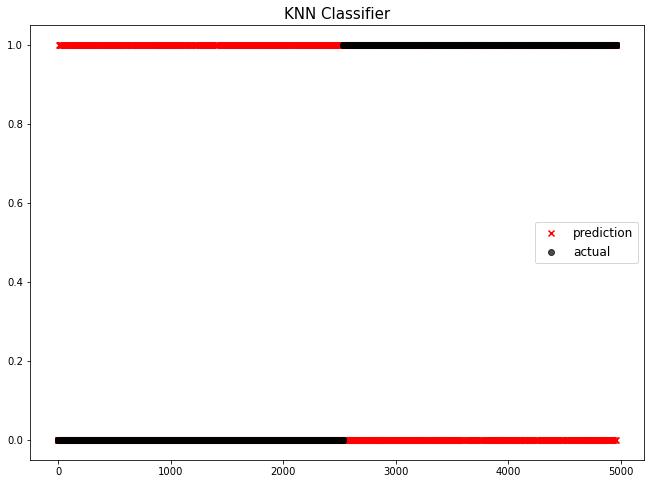

            model        f1
0  KNN Classifier  0.759811


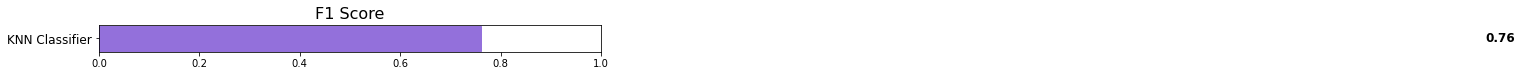

In [6]:
### 모델링 (random_state=0)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score

my_predictions = {}
my_pred = None
my_actual = None
my_name = None

colors = ['r', 'c', 'm', 'y', 'k', 'khaki', 'teal', 'orchid', 'sandybrown',
          'greenyellow', 'dodgerblue', 'deepskyblue', 'rosybrown', 'firebrick',
          'deeppink', 'crimson', 'salmon', 'darkred', 'olivedrab', 'olive', 
          'forestgreen', 'royalblue', 'indigo', 'navy', 'mediumpurple', 'chocolate',
          'gold', 'darkorange', 'seagreen', 'turquoise', 'steelblue', 'slategray', 
          'peru', 'midnightblue', 'slateblue', 'dimgray', 'cadetblue', 'tomato'
         ]

def plot_predictions(name_, pred, actual):
    df = pd.DataFrame({'prediction': pred, 'actual': y_test})
    df = df.sort_values(by='actual').reset_index(drop=True)

    plt.figure(figsize=(11, 8))
    plt.scatter(df.index, df['prediction'], marker='x', color='r')
    plt.scatter(df.index, df['actual'], alpha=0.7, marker='o', color='black')
    plt.title(name_, fontsize=15)
    plt.legend(['prediction', 'actual'], fontsize=12)
    plt.show()

def f1_eval(name_, pred, actual):
    global my_predictions, colors, my_pred, my_actual, my_name
    
    my_name = name_
    my_pred = pred
    my_actual = actual

    plot_predictions(name_, pred, actual)

    f1 = f1_score(actual, pred)
    my_predictions[name_] = f1

    y_value = sorted(my_predictions.items(), key=lambda x: x[1], reverse=True)
    
    df = pd.DataFrame(y_value, columns=['model', 'f1'])
    print(df)
    min_ = 0
    max_ = 1
    
    length = len(df) / 2
    
    plt.figure(figsize=(9, length))
    ax = plt.subplot()
    ax.set_yticks(np.arange(len(df)))
    ax.set_yticklabels(df['model'], fontsize=12)
    bars = ax.barh(np.arange(len(df)), df['f1'], height=0.3)
    
    for i, v in enumerate(df['f1']):
        idx = np.random.choice(len(colors))
        bars[i].set_color(colors[idx])
        ax.text(v + 2, i, str(round(v, 3)), color='k', fontsize=12, fontweight='bold', verticalalignment='center')
        
    plt.title('F1 Score', fontsize=16)
    plt.xlim(min_, max_)
    
    plt.show()
    
def add_model(name_, pred, actual):
    global my_predictions, my_pred, my_actual, my_name
    my_name = name_
    my_pred = pred
    my_actual = actual
    
    f1 = f1_score(actual, pred)
    my_predictions[name_] = f1

def remove_model(name_):
    global my_predictions
    try:
        del my_predictions[name_]
    except KeyError:
        return False
    return True

def plot_all():
    global my_predictions, my_pred, my_actual, my_name
    
    plot_predictions(my_name, my_pred, my_actual)
    
    y_value = sorted(my_predictions.items(), key=lambda x: x[1], reverse=True)
    
    df = pd.DataFrame(y_value, columns=['model', 'f1'])
    print(df)
    min_ = 0
    max_ = 1
    
    length = len(df) / 2
    
    plt.figure(figsize=(9, length))
    ax = plt.subplot()
    ax.set_yticks(np.arange(len(df)))
    ax.set_yticklabels(df['model'], fontsize=12)
    bars = ax.barh(np.arange(len(df)), df['f1'], height=0.3)
    
    for i, v in enumerate(df['f1']):
        idx = np.random.choice(len(colors))
        bars[i].set_color(colors[idx])
        ax.text(v + 2, i, str(round(v, 3)), color='k', fontsize=12, fontweight='bold', verticalalignment='center')
        
    plt.title('F1 Score', fontsize=16)
    plt.xlim(min_, max_)
    
    plt.show()
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
#### knn 파라미터 찾기
from sklearn.neighbors import KNeighborsClassifier
for i in range(1,3):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)
    print(knn.score(X_train, y_train).round(3), knn.score(X_test, y_test).round(3))
    # f1_eval(f'KNN Classifier {i}', pred, y_test)
#### 머신러닝 모델 돌려보기
#### hyperparameter 튜닝 전
# KNN classifier (K=3)
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)
print(knn.score(X_train, y_train).round(3), knn.score(X_test, y_test).round(3))
f1_eval('KNN Classifier', pred, y_test)

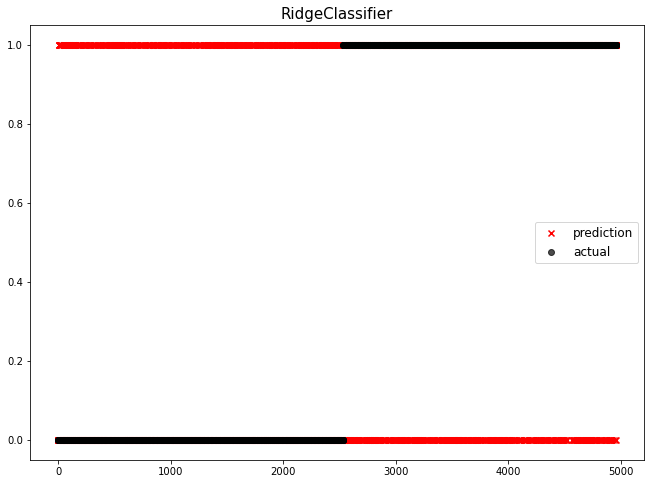

             model        f1
0  RidgeClassifier  0.811367
1   KNN Classifier  0.759811


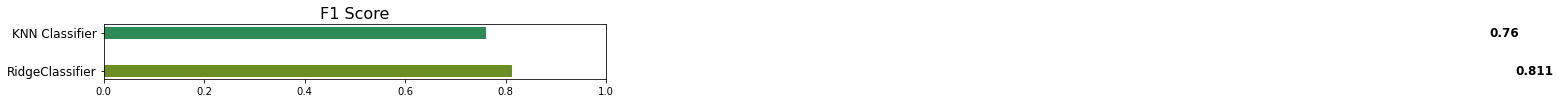

In [7]:
# RidgeCalssifier (alpha=1)
from sklearn.linear_model import RidgeClassifier

ridge = RidgeClassifier(alpha=1)
ridge.fit(X_train, y_train)
pred = ridge.predict(X_test)
f1_eval('RidgeClassifier', pred, y_test)

0.814 0.814


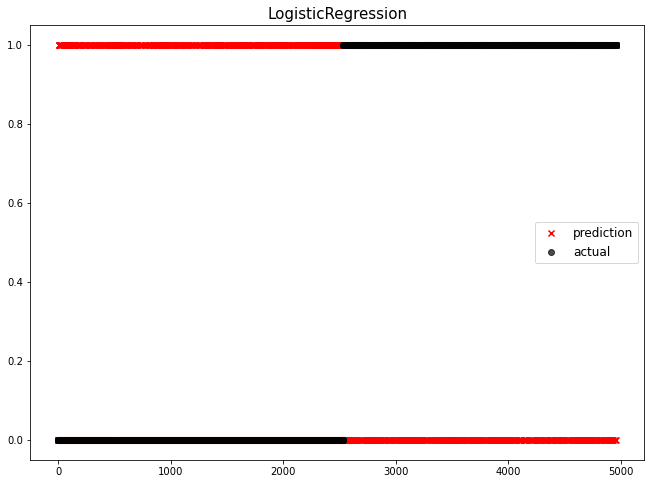

                model        f1
0     RidgeClassifier  0.811367
1  LogisticRegression  0.809730
2      KNN Classifier  0.759811


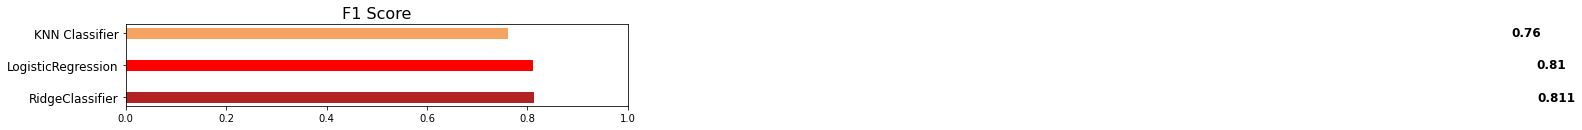

In [8]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

lg = LogisticRegression(random_state=0)
lg.fit(X_train, y_train)
pred = lg.predict(X_test)
print(lg.score(X_train, y_train).round(3), lg.score(X_test, y_test).round(3))
f1_eval('LogisticRegression', pred, y_test)

0.78 0.768


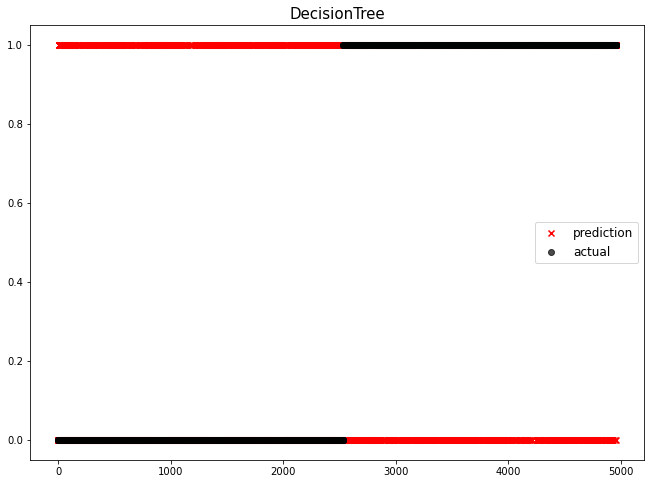

                model        f1
0     RidgeClassifier  0.811367
1  LogisticRegression  0.809730
2        DecisionTree  0.765714
3      KNN Classifier  0.759811


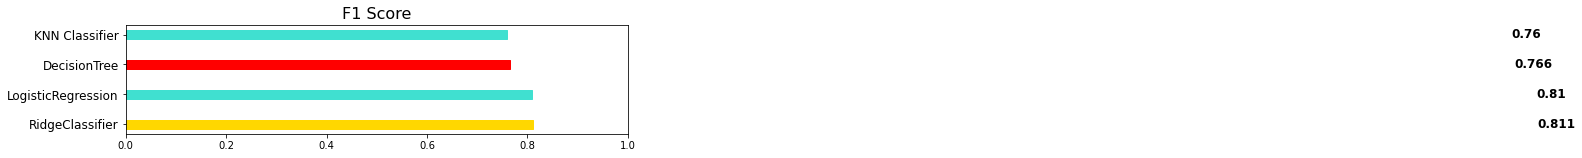

In [9]:
# DecisionTree (max_depth = 5, max_features=0.8)
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=0,max_depth = 5, max_features=0.8)
tree.fit(X_train, y_train)
pred = tree.predict(X_test)
print(tree.score(X_train, y_train).round(3), tree.score(X_test, y_test).round(3))
f1_eval('DecisionTree', pred, y_test)

0.798 0.79


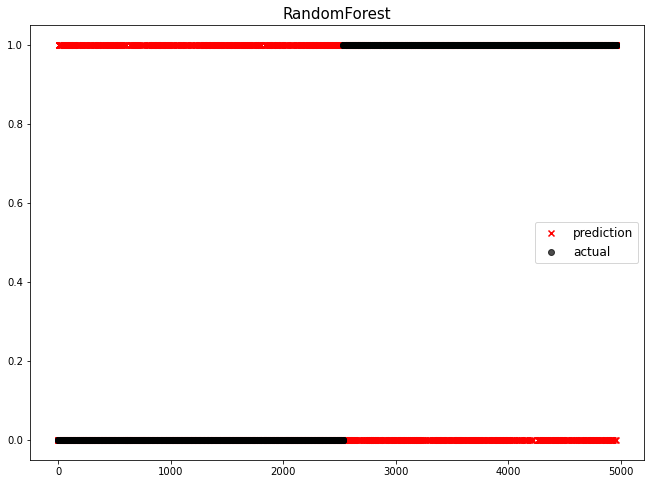

                model        f1
0     RidgeClassifier  0.811367
1  LogisticRegression  0.809730
2        RandomForest  0.787482
3        DecisionTree  0.765714
4      KNN Classifier  0.759811


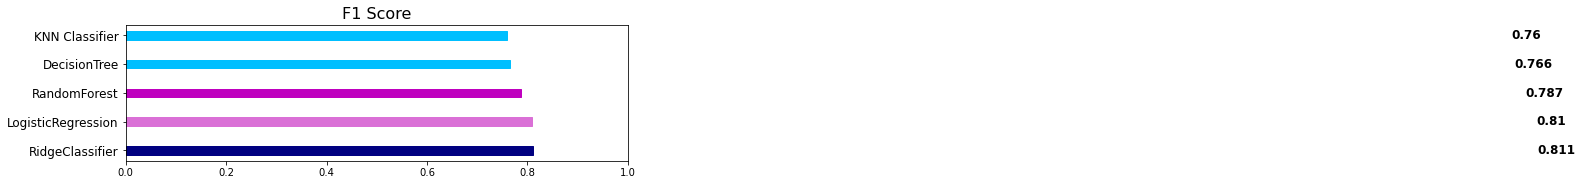

In [10]:
#RF (max_depth = 5)
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(random_state = 0, max_depth = 5)
forest.fit(X_train, y_train)
pred = forest.predict(X_test)
print(forest.score(X_train, y_train).round(3), forest.score(X_test, y_test).round(3))
f1_eval('RandomForest', pred, y_test)

0.918 0.808


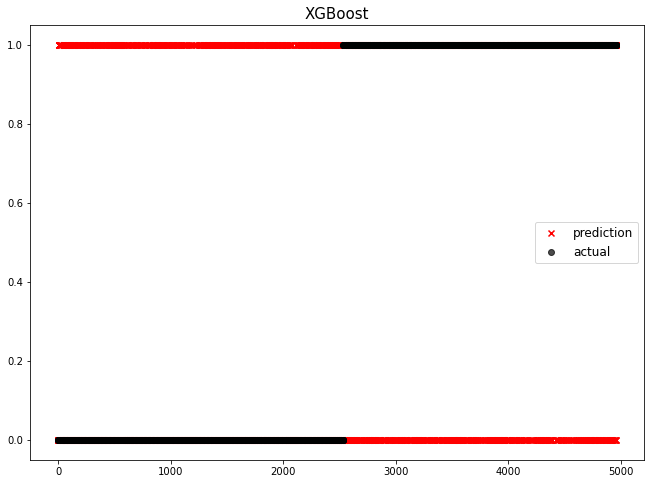

                model        f1
0     RidgeClassifier  0.811367
1  LogisticRegression  0.809730
2             XGBoost  0.804673
3        RandomForest  0.787482
4        DecisionTree  0.765714
5      KNN Classifier  0.759811


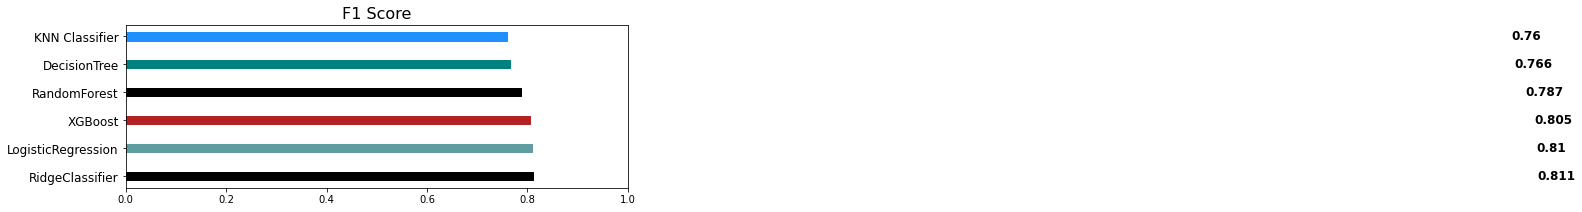

In [11]:
# XGBoost
from xgboost import XGBClassifier

xgb = XGBClassifier(random_state = 0)
xgb.fit(X_train, y_train)
pred = xgb.predict(X_test)
print(xgb.score(X_train, y_train).round(3), xgb.score(X_test, y_test).round(3))
f1_eval('XGBoost', pred, y_test)

0.867 0.814


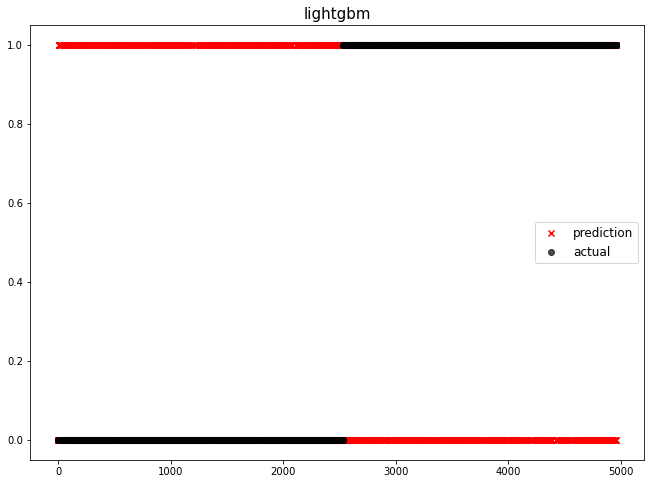

                model        f1
0     RidgeClassifier  0.811367
1  LogisticRegression  0.809730
2             XGBoost  0.804673
3            lightgbm  0.804673
4        RandomForest  0.787482
5        DecisionTree  0.765714
6      KNN Classifier  0.759811


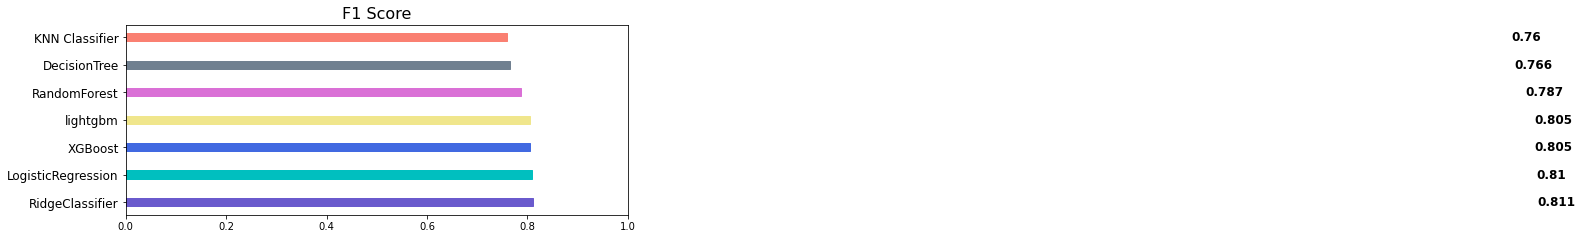

In [12]:
# lightgbm Classifier
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(random_state = 0)
lgbm.fit(X_train, y_train)
lgbm_pred = lgbm.predict(X_test)
print(lgbm.score(X_train, y_train).round(3), lgbm.score(X_test, y_test).round(3))
f1_eval('lightgbm', pred, y_test)

##### 위에서 나온것중 최고의 성능을 끌어내는 하이퍼파라미터를 찾기위해 RF,XGB,Lgbm모델을 Grid Search 진행

In [13]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

#### hyperparameter 튜닝 후

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X_train, X_test, y_train, y_test = train_test_split(df.drop('win',1),df['win'], random_state=0)

scaler = MinMaxScaler()
scaler.fit(X_train)  #train꺼로 transform한걸로 fit 중요!!!!
X_train_temp = scaler.transform(X_train)
X_test_temp = scaler.transform(X_test)
X_train = pd.DataFrame(X_train_temp, columns=X_train.columns, index=list(X_train.index.values))
X_test = pd.DataFrame(X_test_temp, columns=X_test.columns, index=list(X_test.index.values))

C:\Users\ice_9\AppData\Local\Temp\ipykernel_9324\2179540545.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_train, X_test, y_train, y_test = train_test_split(df.drop('win',1),df['win'], random_state=0)


In [15]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=6)        # 6개로 나눈다
n_splits = 6

##### RFclassifier grid search
##### ㅈㄴ 느려서 안함

In [16]:
# #cv 6 grid search
# params = {
#     'n_estimators': [100, 200, 300], 
#     'random_state': [0], 
#     'max_depth': [7, 8, 9, 10], 
#     'max_features': [0.7, 0.8, 0.9], 
#     'min_samples_split': [5, 10, 20],
# }
# #cv 6 grid search
# grid_search = GridSearchCV(RandomForestClassifier(), params, cv=6, n_jobs=-1, scoring='f1')
# grid_search.fit(X_train,y_train)
# y_pred = grid_search.predict(X_test)
# print(grid_search.best_params_)
# print(grid_search.best_score_)
# print(grid_search.score(X_test,y_test)) #해당것 score
# print(roc_auc_score(y_test,y_pred)) #roc score

##### XGBclassifier grid search

In [17]:
params = {
    'n_estimators': [100, 200, 300], 
    'random_state': [0], 
    'learning_rate': [0.01, 0.1], 
    'max_depth': [5, 6, 7], 
    'subsample': [0.6, 0.7, 0.8, 0.9],
}
#cv 6 grid search
grid_search = GridSearchCV(XGBClassifier(), params, cv=6, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train,y_train)
y_pred = grid_search.predict(X_test)
print(grid_search.best_params_)
print(grid_search.best_score_)
print(grid_search.score(X_test,y_test)) #해당것 score
print(roc_auc_score(y_test,y_pred)) #roc score


{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'random_state': 0, 'subsample': 0.8}
0.8141226767586495
0.8154125479120435
0.8154615560007166


##### lgbm grid search

In [18]:
params = {
    'n_estimators': [1500, 2000], 
    'random_state': [0], 
    'learning_rate': [0.01], 
    'max_depth': [5, 6, 7], 
    'subsample': [0.6, 0.7],
    'colsample_bytree' : [0.8, 0.9]
}
#cv 6 grid search
grid_search = GridSearchCV(LGBMClassifier(), params, cv=6, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train,y_train)
y_pred = grid_search.predict(X_test)
print(grid_search.best_params_)
print(grid_search.best_score_)
print(grid_search.score(X_test,y_test)) #해당것 score
print(roc_auc_score(y_test,y_pred)) #roc score

# lgbm_best = LGBMClassifier(**grid_search.best_params_)
# lgbm_best.fit(X_train, y_train)
# lgbm_best_pred = lgbm_best.predict(X_test)
# f1_eval('GridSearch lgbm', lgbm_best_pred, y_test)

{'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 2000, 'random_state': 0, 'subsample': 0.6}
0.8134497928957832
0.8178333669558201
0.8179009299522808


##### 여기서부터 위에 나온 최적의 파라미터들을 대입해줘야함

#### 1.randomforest, 2.xgboost, 3.Light_GBM 만 사용

-정확도(Accuracy)  

from sklearn.metrics import accuracy_score  
accuracy = accuracy_score(pred, y_test)
accuracy

-정밀도(Precision)  

from sklearn.metrics import precision_score
precision = precision_score(y_test, pred)
precision

-재현율(Recall)  

from sklearn.metrics import recall_score
recall = recall_score(y_test, pred)
recall

-F1 score  

from sklearn.metrics import f1_score
f1 = f1_score(y_test, pred)
f1

-AUC (Area Uder Curve)  

from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test,y_pred)
auc

0.8059310066572524
0.8074226804123711
0.7982062780269058
0.8027880278802788
0.8058523402914082


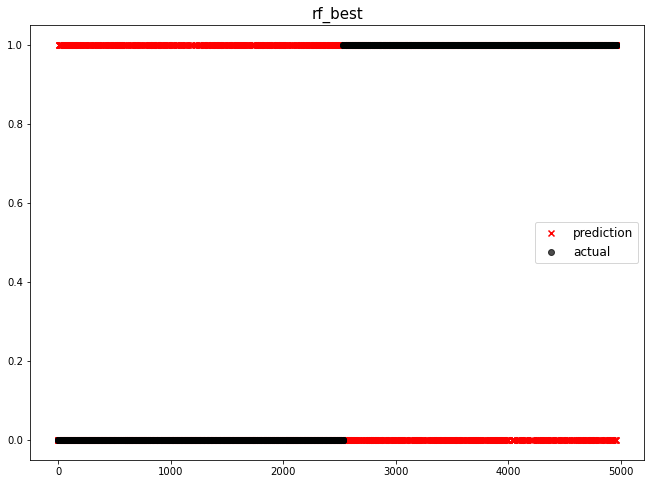

                model        f1
0     RidgeClassifier  0.811367
1  LogisticRegression  0.809730
2             XGBoost  0.804673
3            lightgbm  0.804673
4             rf_best  0.802788
5        RandomForest  0.787482
6        DecisionTree  0.765714
7      KNN Classifier  0.759811


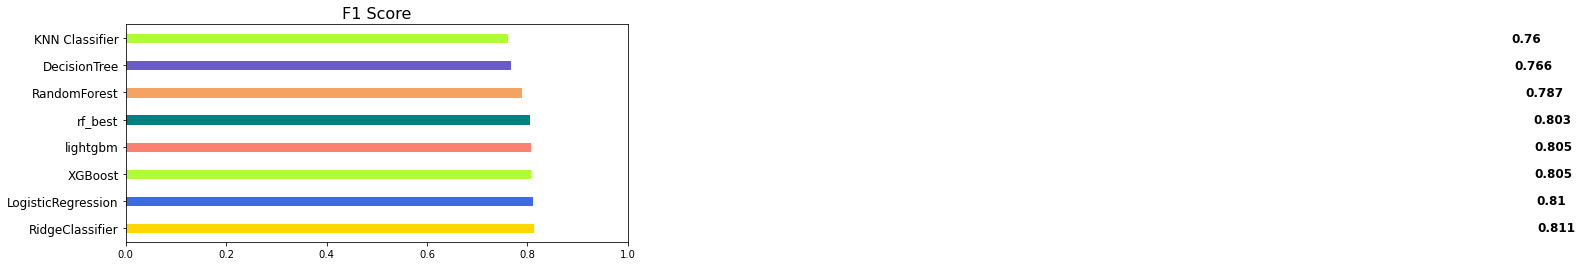

In [19]:
rf_best = RandomForestClassifier(max_depth=8, max_features= 0.8, min_samples_split= 10, n_estimators= 100, random_state= 0)
rf_best.fit(X_train, y_train)
rf_best_pred = rf_best.predict(X_test)
print(accuracy_score(rf_best_pred, y_test))
print(precision_score(rf_best_pred, y_test))
print(recall_score(rf_best_pred, y_test))
print(f1_score(rf_best_pred, y_test))
print(roc_auc_score(rf_best_pred,y_test))
f1_eval('rf_best', rf_best_pred, y_test)

0.8154125479120435
0.8177319587628866
0.8074104234527687
0.812538414259373
0.8153405575880397


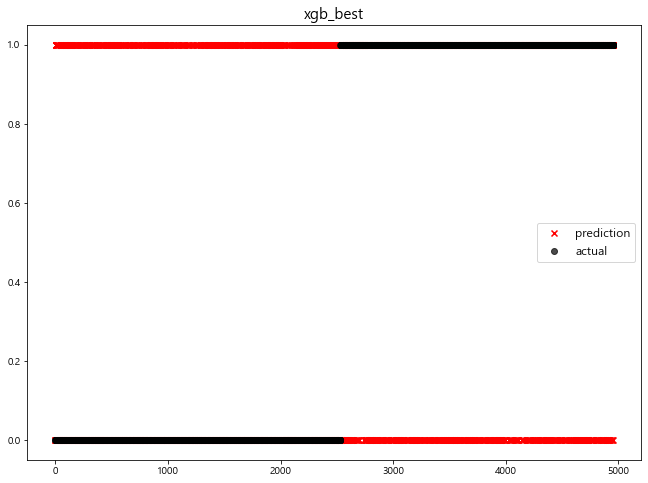

                model        f1
0           lgbm_best  0.812808
1            xgb_best  0.812538
2     RidgeClassifier  0.811367
3  LogisticRegression  0.809730
4             XGBoost  0.804673
5            lightgbm  0.804673
6             rf_best  0.802788
7        RandomForest  0.787482
8        DecisionTree  0.765714
9      KNN Classifier  0.759811


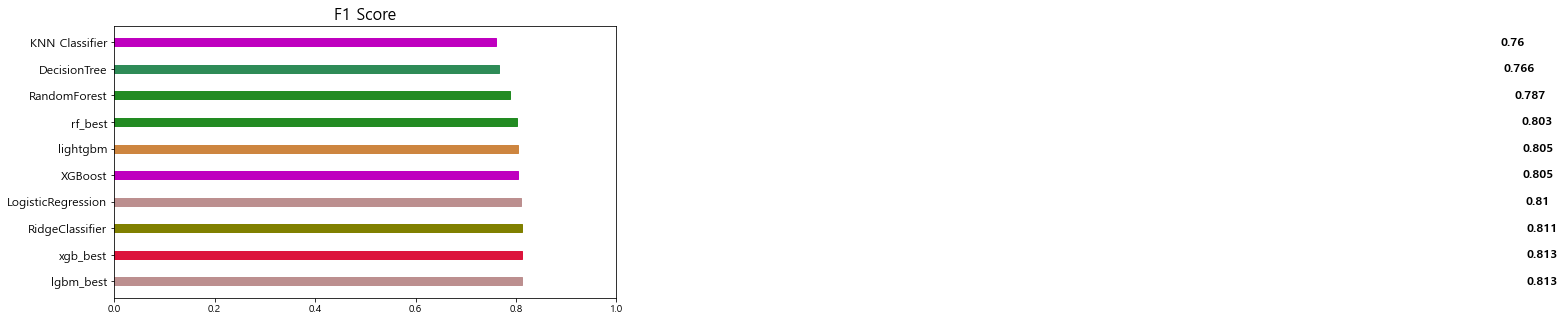

In [30]:
xgb_best = XGBClassifier(learning_rate= 0.1, max_depth= 5, n_estimators= 100, random_state= 0, subsample= 0.8)
xgb_best.fit(X_train, y_train)
xgb_best_pred = xgb_best.predict(X_test)
print(accuracy_score(xgb_best_pred, y_test))
print(precision_score(xgb_best_pred, y_test))
print(recall_score(xgb_best_pred, y_test))
print(f1_score(xgb_best_pred, y_test))
print(roc_auc_score(xgb_best_pred,y_test))
f1_eval('xgb_best', xgb_best_pred, y_test)


0.8178333669558201
0.8210309278350515
0.8093495934959349
0.8151484135107471
0.8177705116057967


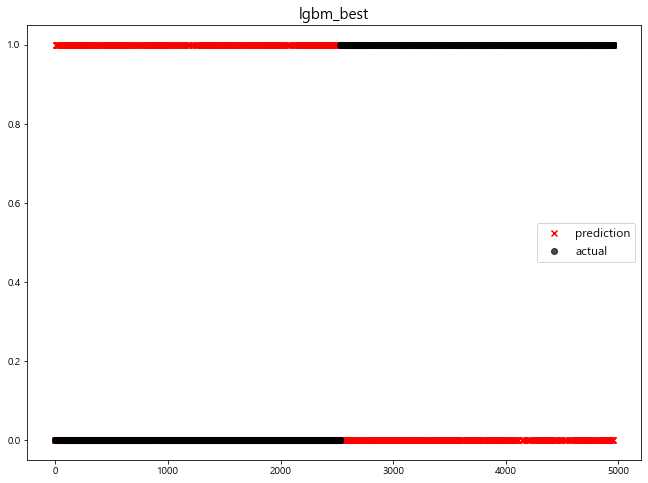

                model        f1
0           lgbm_best  0.815148
1            xgb_best  0.812538
2     RidgeClassifier  0.811367
3  LogisticRegression  0.809730
4             XGBoost  0.804673
5            lightgbm  0.804673
6             rf_best  0.802788
7        RandomForest  0.787482
8        DecisionTree  0.765714
9      KNN Classifier  0.759811


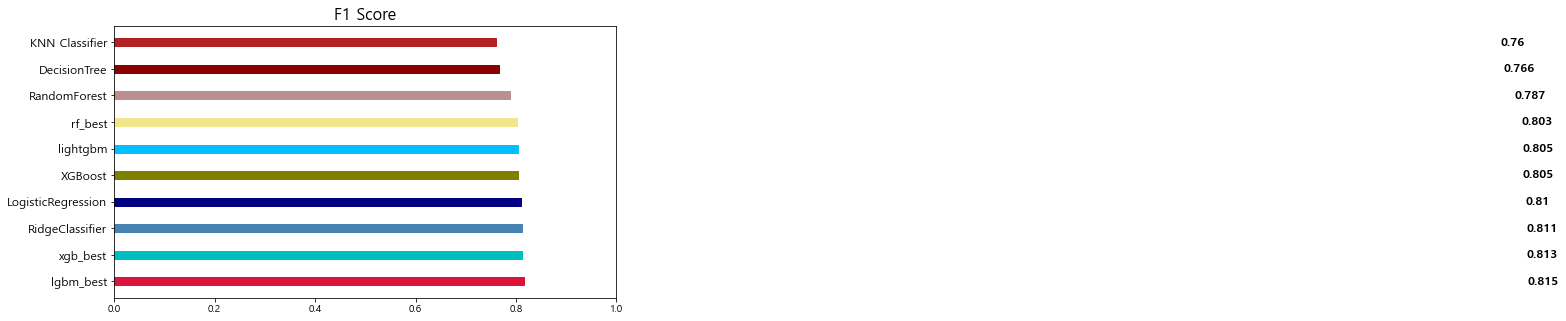

In [31]:
lgbm_best = LGBMClassifier(colsample_bytree = 0.8, learning_rate = 0.01, max_depth = 5, n_estimators = 2000, random_state = 0, subsample = 0.6)
lgbm_best.fit(X_train, y_train)
lgbm_best_pred = lgbm_best.predict(X_test)
print(accuracy_score(lgbm_best_pred, y_test))
print(precision_score(lgbm_best_pred, y_test))
print(recall_score(lgbm_best_pred, y_test))
print(f1_score(lgbm_best_pred, y_test))
print(roc_auc_score(lgbm_best_pred,y_test))
f1_eval('lgbm_best', lgbm_best_pred, y_test)

##### 변수중요도 찍기

In [22]:
# 한글깨짐 방지하기
import shap
import platform
if platform.system() == 'Darwin': #맥
        plt.rc('font', family='AppleGothic') 
elif platform.system() == 'Windows': #윈도우
        plt.rc('font', family='Malgun Gothic') 
elif platform.system() == 'Linux': #리눅스 (구글 콜랩)
        #!wget "https://www.wfonts.com/download/data/2016/06/13/malgun-gothic/malgun.ttf"
        #!mv malgun.ttf /usr/share/fonts/truetype/
        #import matplotlib.font_manager as fm 
        #fm._rebuild()
        plt.rc('font', family='Malgun Gothic') 
plt.rcParams['axes.unicode_minus'] = False #한글 폰트 사용시 마이너스 폰트 깨짐 해결
#matplotlib 패키지 한글 깨짐 처리 끝

#### Feature importance
 - Xgboost에서는 Weight, Cover, Gain을 기준으로 판단된다. 이 기준에 대한 뜻은 아래와 같다.

 - Weight : 변수 별 데이터를 분리하는데 쓰인 횟수 

 - Cover : 해당 변수로 분리된 데이터의 수

 - Gain : Feature을 사용했을 때 줄어드는 평균적인 training loss

 - 이러한 기준을 통해서 feature의 importance가 구분

 -> 문제가 한 가지 더 발생한다. 위의 기준으로 내린 각각의 중요한 변수를 봐보면, 각 Weight/Cover/Gain마다 너무 상이한 변수들을 중요하다고 말한다.   
 
 => 이러한 문제들을 보완하기 위해서 나온 방법이 바로 **Shap Value**이다. 

#### SHAP Value
- 여러번 수행하며 반복적인 결과물의 평균이기에 Consistency가 잘 유지 
- 그리고 Shap Value는 영향에 대한 방향성 (positive or negative) 또한 말해준다. 즉, feature importance에서 단점이 보완이 되는 것

#### 결론: 
1. feature value 값이라는 게 ㅈㄴ 구리다.
2. 그래서 shap value로 변수중요도를 파악한다.
3. shap value를 시각화한 그래프에서 순서대로 변수가 중요하다는 것을 알 수 있음

##### - xgb SHAP

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


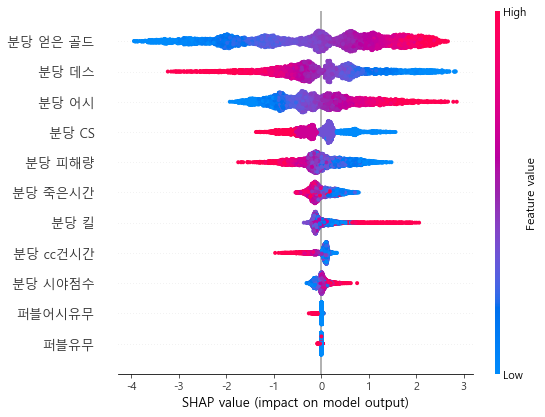

In [32]:
shap.initjs()
import shap
explainer = shap.TreeExplainer(xgb_best) # Tree model Shap Value 확인 객체 지정
shap_values = explainer.shap_values(X_test) # Shap Values 계산
shap.initjs() # javascript 초기화 (graph 초기화)
shap.summary_plot(shap_values, X_test)

#### bar모형으로 mean(|Shap Value|)로 평균적인 값으로 크게 영향을 미치는 것을 확인

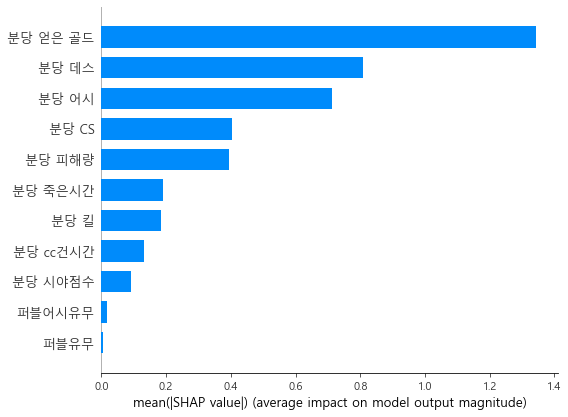

In [33]:
shap.summary_plot(shap_values, X_test, plot_type = "bar")

#### PermutationImportance
- Feature Importance의 단점을 보완
- 어느 모델에서든지 적용이 가능하여 모델의 변수중요도를 파악하는 데에 사용.
- 최종적으로 feature importance말고 PermutationImportance를 쓴다.

##### XGB PermutationImportance 수치

In [34]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(xgb_best, scoring = "f1", random_state = 42).fit(X_test, y_test)
eli5.show_weights(perm, top = 80, feature_names = X_test.columns.tolist())

Weight,Feature
0.1988 ± 0.0078,분당 얻은 골드
0.0902 ± 0.0064,분당 데스
0.0740 ± 0.0084,분당 어시
0.0301 ± 0.0080,분당 피해량
0.0289 ± 0.0050,분당 CS
0.0071 ± 0.0056,분당 킬
0.0034 ± 0.0034,분당 죽은시간
0.0008 ± 0.0021,분당 cc건시간
0.0002 ± 0.0009,퍼블어시유무
0.0001 ± 0.0022,분당 시야점수


##### - LGBM SHAP

LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


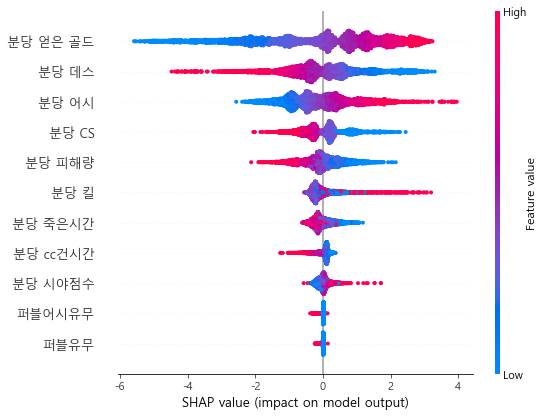

In [35]:
import shap
explainer = shap.TreeExplainer(lgbm_best) # Tree model Shap Value 확인 객체 지정
shap_values = explainer.shap_values(X_test) # Shap Values 계산
shap.initjs() # javascript 초기화 (graph 초기화)
shap.summary_plot(shap_values[1], X_test)

#### bar모형으로 mean(|Shap Value|)로 평균적인 값으로 크게 영향을 미치는 것을 확인

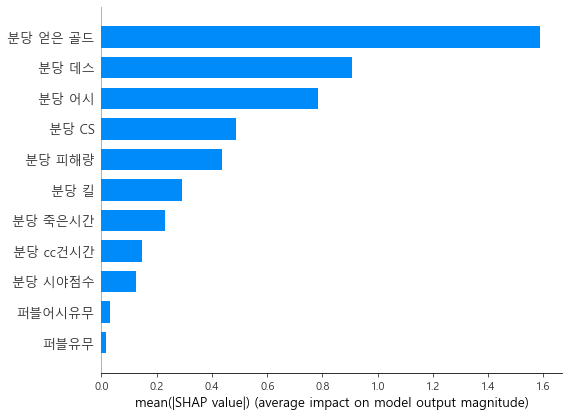

In [36]:
shap.summary_plot(shap_values[1], X_test, plot_type = "bar")

##### LGBM PermutationImportance 수치

In [37]:
perm = PermutationImportance(lgbm_best, scoring = "f1", random_state = 42).fit(X_test, y_test)
eli5.show_weights(perm, top = 80, feature_names = X_test.columns.tolist())

Weight,Feature
0.2113 ± 0.0119,분당 얻은 골드
0.0946 ± 0.0073,분당 데스
0.0724 ± 0.0100,분당 어시
0.0355 ± 0.0060,분당 CS
0.0330 ± 0.0066,분당 피해량
0.0142 ± 0.0053,분당 킬
0.0079 ± 0.0019,분당 죽은시간
0.0029 ± 0.0015,분당 시야점수
0.0014 ± 0.0021,분당 cc건시간
0.0006 ± 0.0008,퍼블어시유무


In [29]:
'''
정리
1. 각 라인의 csv파일을 불러옴
2. 다중공선성(vif) 확인
3.  RandomForest
    LogisticRegression
    RidgeClassifier
    XGBoost          
    lightgbm  
    DecisionTree  
    KNN Classifier 모델을 돌려봄
4. RandomForest, XGBoost, lightgbm을 gridsearch로 최적의 파라미터 찾음
5. 찾은 값으로 모델돌리기. 이때 최종 모델이므로 성능지표로 (정확도, 정밀도,재현율,f1_score,auc_score측정)
6. 변수중요도를 시각적으로 알아보기 위해 Shap Value로 파라미터 튜닝안한 XGBoost, lightgbm를 시각화해서 알아봄
7. 변수중요도를 수치적으로 알아보기 위해 PermutationImportance로 파라미터 튜닝안한 XGBoost, lightgbm의 각 변수들의 weight를 측정함.

'''

'\n정리\n1. 각 라인의 csv파일을 불러옴\n2. 다중공선성(vif) 확인\n3.  RandomForest\n    LogisticRegression\n    RidgeClassifier\n    XGBoost          \n    lightgbm  \n    DecisionTree  \n    KNN Classifier 모델을 돌려봄\n4. RandomForest, XGBoost, lightgbm을 gridsearch로 최적의 파라미터 찾음\n5. 찾은 값으로 모델돌리기. 이때 최종 모델이므로 성능지표로 (정확도, 정밀도,재현율,f1_score,auc_score측정)\n6. 변수중요도를 시각적으로 알아보기 위해 Shap Value로 파라미터 튜닝안한 XGBoost, lightgbm를 시각화해서 알아봄\n7. 변수중요도를 수치적으로 알아보기 위해 PermutationImportance로 파라미터 튜닝안한 XGBoost, lightgbm의 각 변수들의 weight를 측정함.\n\n'